In [1]:
!/gws/pw/j05/cop26_hackathons/bristol/install-kernel

Installed kernelspec cmip6 in /home/users/chebak/.local/share/jupyter/kernels/cmip6
Installed cmip6 Jupyter kernel for the hackathon


In [23]:
#import packages - works in CMIP6 notebook
from itertools import chain
from glob import glob
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm 
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from palettable.cmocean.sequential import Algae_20
from palettable.cmocean.diverging import Balance_20
import numpy as np
from matplotlib.colors import BoundaryNorm
import pandas as pd

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [44]:
#read in ssp370 UKESM1
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/te_timeseries_expc_Omon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_*.nc'
dataset = xr.open_mfdataset(path)
datetimeindex = dataset.indexes['time'].to_datetimeindex()
dataset['time'] = datetimeindex
expc_ukesm=dataset['expc']
time_ukesm=dataset['time']
expc_ukesm[expc_ukesm==0]=np.nan
print(time_ukesm)



<xarray.DataArray 'time' (time: 1032)>
array(['2015-01-16T00:00:00.000000000', '2015-02-16T00:00:00.000000000',
       '2015-03-16T00:00:00.000000000', ..., '2100-10-16T00:00:00.000000000',
       '2100-11-16T00:00:00.000000000', '2100-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16 2015-02-16 ... 2100-12-16


<ipython-input-44-21f0646fa8ae>:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset.indexes['time'].to_datetimeindex()


In [47]:
#read in ssp370 GFDL-ESM4
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/te_timeseries_expc_Omon_GFDL-ESM4_ssp370_r1i1p1f1_gr_*.nc'
dataset2 = xr.open_mfdataset(path)
datetimeindex = dataset2.indexes['time'].to_datetimeindex()
dataset2['time'] = datetimeindex
expc_gfdl=dataset2['expc']
time_gfdl=dataset2['time']
expc_gfdl[expc_gfdl==0]=np.nan
print(time_gfdl)

<xarray.DataArray 'time' (time: 1032)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-03-16T12:00:00.000000000', ..., '2100-10-16T12:00:00.000000000',
       '2100-11-16T00:00:00.000000000', '2100-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00


<ipython-input-47-e24f80656ffa>:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset2.indexes['time'].to_datetimeindex()


In [58]:
#read in ssp370 IPSL
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/te_timeseries_expc_Omon_IPSL-CM5A2-INCA_ssp370_r1i1p1f1_gn*.nc'
dataset3 = xr.open_mfdataset(path)
datetimeindex = dataset3.indexes['time'].to_datetimeindex()
dataset3['time'] = datetimeindex
expc_ipsl=dataset3['expc']
time_ipsl=dataset3['time']
expc_ipsl[expc_ipsl==0]=np.nan


<ipython-input-58-2d36257de259>:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset3.indexes['time'].to_datetimeindex()


In [59]:
#read in ssp370 MPI-ESM1-2-HR
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/te_timeseries_expc_Omon_MPI-ESM1-2-HR_ssp370_r1i1p1f1_gn*.nc'
dataset4 = xr.open_mfdataset(path)
expc_mpi=dataset4['expc']
time_mpi=dataset4['time']
expc_mpi[expc_mpi==0]=np.nan
print(expc_mpi.shape)
print(time_mpi)


(1032,)
<xarray.DataArray 'time' (time: 1032)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-03-16T12:00:00.000000000', ..., '2100-10-16T12:00:00.000000000',
       '2100-11-16T00:00:00.000000000', '2100-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


In [60]:
#read in ssp370 cmcc
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/te_timeseries_expc_Oyr_CMCC-ESM2_ssp370_r1i1p1f1_gn_*.nc'
dataset5 = xr.open_mfdataset(path)
datetimeindex = dataset5.indexes['time'].to_datetimeindex()
dataset5['time'] = datetimeindex
expc_cmcc=dataset5['expc']
time_cmcc=dataset5['time']
expc_cmcc[expc_cmcc==0]=np.nan



<ipython-input-60-3808f033177b>:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset5.indexes['time'].to_datetimeindex()


In [61]:
#read in ssp370 IPSL CM6A
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/te_timeseries_expc_Omon_IPSL-CM6A-LR_ssp370_r1i1p1f1_gn_*.nc'
dataset4 = xr.open_mfdataset(path)
expc_ipslcm6a=dataset4['expc']
time_ipslcm6a=dataset4['time']
expc_ipslcm6a[expc_ipslcm6a==0]=np.nan

In [64]:
#read in ssp370 ESM1-2-LR
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/te_timeseries_expc_Omon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn*.nc'
dataset5 = xr.open_mfdataset(path)
expc_esm12lr=dataset5['expc']
time_esm12lr=dataset5['time']
expc_esm12lr[expc_esm12lr==0]=np.nan
print(time_esm12lr)

<xarray.DataArray 'time' (time: 1032)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-03-16T12:00:00.000000000', ..., '2100-10-16T12:00:00.000000000',
       '2100-11-16T00:00:00.000000000', '2100-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


In [65]:
#read in ssp370 ESM1-2-HAM
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/te_timeseries_expc_Omon_MPI-ESM-1-2-HAM_ssp370_r1i1p1f1_gn*.nc'
dataset6 = xr.open_mfdataset(path)
expc_esm12ham=dataset6['expc']
time_esm12ham=dataset6['time']
expc_esm12ham[expc_esm12ham==0]=np.nan
print(time_esm12ham)

<xarray.DataArray 'time' (time: 492)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-03-16T12:00:00.000000000', ..., '2055-10-16T12:00:00.000000000',
       '2055-11-16T00:00:00.000000000', '2055-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2055-12-16T12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


In [66]:
#read in ssp370 ESM1-2-HR
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/te_timeseries_expc_Omon_MPI-ESM1-2-HR_ssp370_r1i1p1f1_gn_*.nc'
dataset7 = xr.open_mfdataset(path)
expc_esm12hr=dataset7['expc']
time_esm12hr=dataset7['time']
expc_esm12hr[expc_esm12hr==0]=np.nan
print(time_esm12hr)

<xarray.DataArray 'time' (time: 1032)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-03-16T12:00:00.000000000', ..., '2100-10-16T12:00:00.000000000',
       '2100-11-16T00:00:00.000000000', '2100-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


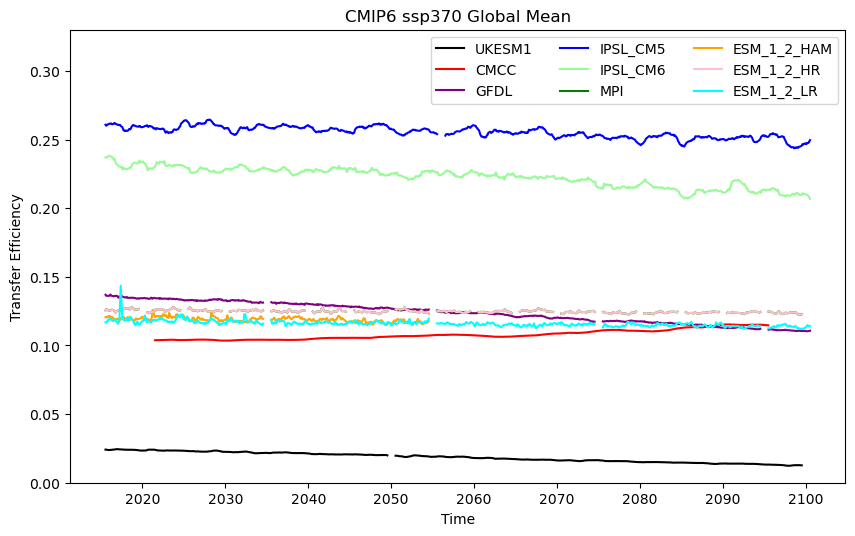

In [75]:
plt.figure()
plt.plot(time_ukesm,expc_ukesm,'k',label='UKESM1')
plt.plot(time_cmcc,expc_cmcc,'r',label='CMCC')
plt.plot(time_gfdl,expc_gfdl,'purple',label='GFDL')
plt.plot(time_ipsl,expc_ipsl,'b',label='IPSL_CM5')
plt.plot(time_ipslcm6a,expc_ipslcm6a,'palegreen',label='IPSL_CM6')
plt.plot(time_mpi,expc_mpi,'g',label='MPI')
plt.plot(time_esm12ham,expc_esm12ham,'orange',label='ESM_1_2_HAM')
plt.plot(time_esm12hr,expc_esm12hr,'pink',label='ESM_1_2_HR')
plt.plot(time_esm12lr,expc_esm12lr,'cyan',label='ESM_1_2_LR')
plt.xlabel('Time')
plt.ylabel('Transfer Efficiency')
plt.ylim([0,0.33])
plt.legend(loc='upper right', ncol = 3)
plt.title('CMIP6 ssp370 Global Mean')
plt.savefig('CMIP6_Transfer_Efficiency_ssp370.png')